### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

Numeri casuali generati gamma:  [2.42635492e-01 4.08979808e-01 1.64457252e+00 1.02762161e-02
 5.90946281e-01 8.60078034e-01 1.01771202e+00 7.86633000e-01
 7.58658545e-01 1.38045705e-01 1.25917851e+00 3.98656769e-01
 1.63665244e+00 6.35952466e-01 1.26844340e+00 2.88516797e-01
 2.15846737e+00 6.27700019e-01 2.54268854e+00 5.21385562e-02
 9.61797105e-01 3.03887695e+00 8.02607789e-01 1.09178995e+00
 2.62565407e-03 3.99316728e-01 1.64717422e+00 2.18971628e-01
 8.74279476e-01 1.85763147e+00 9.28899888e-01 5.31996233e-01
 3.28669913e+00 1.03394600e+00 6.58864228e-01 5.98440781e-01
 1.24540223e-01 2.34975687e-01 1.33394851e+00 1.16134899e+00
 2.26696546e-01 1.00845583e+00 4.17825929e-01 7.91842627e-01
 1.26368342e+00 2.71954889e-01 1.16012129e+00 1.12248941e+00
 1.97973884e+00 3.05156756e-01 4.95297583e-01 5.21665925e-01
 1.33357722e+00 1.49668388e+00 9.71109040e-01 5.50952935e-01
 2.37024896e+00 2.12982000e-01 2.85916075e-01 1.93362931e+00
 2.07048796e+00 1.63260854e+00 9.24679916e-01 7.42287

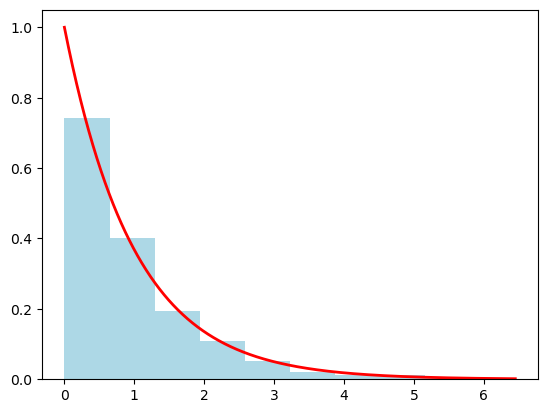

Parametri di forma stimato con fit:  1.0362754402570613


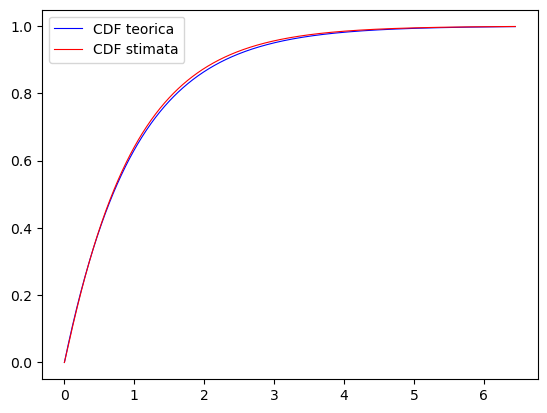

La varianza è:  0.8842965832258993


In [ ]:
import math
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from model import TrendModel, FitTrendModel

#1000 valori casuali da distribuzione gamma
g = np.random.gamma(1, 1,1000)
print("Numeri casuali generati gamma: ", g)

#istogramma
x=np.linspace(0, np.max(g), 1000)
gamma=stats.gamma.pdf(x, 1, 0, 1)

plt.hist(g, density=True, color="lightblue")
plt.plot(x, gamma, lw=2, color="red")
plt.title="Distribuzione gamma"
plt.xlabel="Numero generato causalmente"
plt.ylabel="Frequenza"
plt.show()

#fit
shape_est, loc_est, scale_est = stats.gamma.fit(g)
print("Parametri di forma stimato con fit: ", shape_est)

#calcolo cdf
teorica = stats.gamma.cdf(x, a=1, loc=0, scale=1)
stimata = stats.gamma.cdf(x, a=shape_est, loc=loc_est, scale=scale_est)

plt.plot(x, teorica, lw=0.8, label="CDF teorica", color="blue")
plt.plot(x, stimata, lw=0.8, label="CDF stimata", color ="red")
plt.legend()
plt.title="CDF"
plt.show()

#varianza
print("La varianza è: ", np.var(g))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Mae dei valori massimi:  0.3088803611176883
Rmse dei valori massimi:  0.49759374663091915

Mae dei valori minimi:  0.42853637589199184
Rmse dei valori minimi:  0.6404436004589467


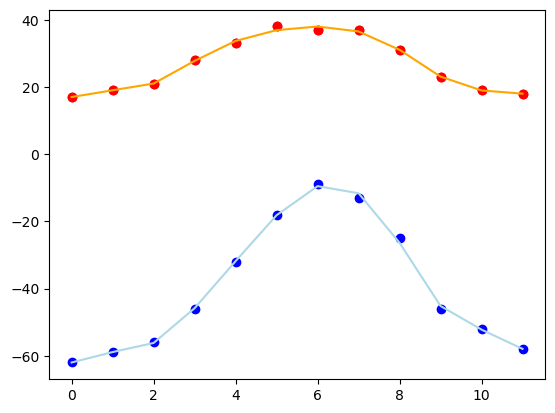

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel="Month"
plt.ylabel="Min and max temperature"

x=months
y=temp_max
z=temp_min

coeff1 = np.polyfit(x, y, deg=8)
model1 = np.poly1d(coeff1)
y_pred1=model1(x)

coeff2=np.polyfit(x, z, deg=8)
model2 = np.poly1d(coeff2)
z_pred = model2(x)

#mae e rmse 
mae1=mean_absolute_error(y, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y, y_pred1))
print("Mae dei valori massimi: ", mae1)
print("Rmse dei valori massimi: ", rmse1)

mae2=mean_absolute_error(z, z_pred)
rmse2=np.sqrt(mean_squared_error(z, z_pred))
print("\nMae dei valori minimi: ", mae2)
print("Rmse dei valori minimi: ", rmse2)

plt.scatter(x, y, color="red", marker="o")
plt.plot(x, y_pred1, color="orange")
plt.plot(x, z_pred, color="lightblue")






### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [2]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
